In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/zillow-property-data-listing/zillow_com-zillow_property_details__20200401_20200630_sample.csv')
df.head()

,Uniq Id,Crawl Timestamp,Property Url,Address,City,State,Zip,Rent,Beds,Baths,...,Days Listed And Contacts,Most Recent Tax Assessed Value,Broker Manager Owner,Agent Name,Phone Number,Source,Zpid,County,Latitude,Longitude
0,e9cc773e6b6d0811de2eeb7a102a9b4d,2020-04-27 00:45:07 +0000,https://www.zillow.com/homedetails/521-Quapaw-...,521 Quapaw Ave,Hot Springs,AR,71901,1000,3,2.5,...,21 days,NaN,NaN,Lisa S Keating,NaN,Source: created using Zillow Rental Manager,2144288389,Garland County,34.506490,-93.059354
1,4ee6e04e77bfb0ab3771c7f050ed7cb4,2020-04-27 01:07:57 +0000,https://www.zillow.com/homedetails/1012-S-25th...,1012 S 25th Pl,Rogers,AR,72758,1395,3,2.5,...,9 days,NaN,"NWA Realty Group, LLC",Juanita Reeves,(479) 273-6900,Source: Northwest Arkansas Board of REALTORS,2080676222,Benton County,36.322916,-94.156243
2,52668e3bb063f096ba503559ce066e03,2020-04-27 01:17:28 +0000,https://www.zillow.com/homedetails/4424-Bruno-...,4424 Bruno Rd,Little Rock,AR,72209,900,3,1.5,...,3 days,2019|614.59-0.0016187327000000001|8780,NaN,DANNY SANFORD,NaN,Source: created using Zillow Rental Manager,322447,Pulaski County,34.667221,-92.327667
3,367e4b84d19ffe1d0a6b634fc42e5e0f,2020-04-27 01:19:01 +0000,https://www.zillow.com/homedetails/6423-Kenwoo...,6423 Kenwood Rd,Cammack Village,AR,72207,1500,3,2.0,...,108 days,2019|2151.2-1.1487915|34800,NaN,NaN,(501) 313-8435,Source: created using Zillow Rental Manager,329620,Pulaski County,34.779334,-92.345723
4,28c5aafcccaf95ce4c78b1af65ce6699,2020-04-27 01:07:50 +0000,https://www.zillow.com/homedetails/1705-Glen-S...,1705 Glen St,Springdale,AR,72762,1400,3,2.0,...,20 days,2019|826.713.6912993|21770,NaN,Greg,(801) 319-9544,Source: created using Zillow Rental Manager,72856873,Washington County,36.201825,-94.164233


In [18]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Property Url', 'Address', 'City',
       'State', 'Zip', 'Rent', 'Beds', 'Baths', 'Sqft', 'Property Type',
       'Number Of Units', 'Current Rent Zestimate',
       'Current Zestimate Of Value Of Home', 'Days Listed And Contacts',
       'Most Recent Tax Assessed Value', 'Broker Manager Owner', 'Agent Name',
       'Phone Number', 'Source', 'Zpid', 'County', 'Latitude', 'Longitude'],
      dtype='object')

In [23]:
df = df.drop(['Uniq Id','Crawl Timestamp','Property Url'],axis=1)
df.head()

,Address,City,State,Zip,Rent,Beds,Baths,Sqft,Property Type,Number Of Units,...,Days Listed And Contacts,Most Recent Tax Assessed Value,Broker Manager Owner,Agent Name,Phone Number,Source,Zpid,County,Latitude,Longitude
0,521 Quapaw Ave,Hot Springs,AR,71901,1000,3,2.5,1400.0,APARTMENT,NaN,...,21 days,NaN,NaN,Lisa S Keating,NaN,Source: created using Zillow Rental Manager,2144288389,Garland County,34.506490,-93.059354
1,1012 S 25th Pl,Rogers,AR,72758,1395,3,2.5,1425.0,SINGLE_FAMILY,NaN,...,9 days,NaN,"NWA Realty Group, LLC",Juanita Reeves,(479) 273-6900,Source: Northwest Arkansas Board of REALTORS,2080676222,Benton County,36.322916,-94.156243
2,4424 Bruno Rd,Little Rock,AR,72209,900,3,1.5,1340.0,SINGLE_FAMILY,NaN,...,3 days,2019|614.59-0.0016187327000000001|8780,NaN,DANNY SANFORD,NaN,Source: created using Zillow Rental Manager,322447,Pulaski County,34.667221,-92.327667
3,6423 Kenwood Rd,Cammack Village,AR,72207,1500,3,2.0,1431.0,SINGLE_FAMILY,NaN,...,108 days,2019|2151.2-1.1487915|34800,NaN,NaN,(501) 313-8435,Source: created using Zillow Rental Manager,329620,Pulaski County,34.779334,-92.345723
4,1705 Glen St,Springdale,AR,72762,1400,3,2.0,1602.0,SINGLE_FAMILY,NaN,...,20 days,2019|826.713.6912993|21770,NaN,Greg,(801) 319-9544,Source: created using Zillow Rental Manager,72856873,Washington County,36.201825,-94.164233


In [25]:
df.columns

Index(['Address', 'City', 'State', 'Zip', 'Rent', 'Beds', 'Baths', 'Sqft',
       'Property Type', 'Number Of Units', 'Current Rent Zestimate',
       'Current Zestimate Of Value Of Home', 'Days Listed And Contacts',
       'Most Recent Tax Assessed Value', 'Broker Manager Owner', 'Agent Name',
       'Phone Number', 'Source', 'Zpid', 'County', 'Latitude', 'Longitude'],
      dtype='object')

In [26]:
df = df.drop(['Zpid','Source','Latitude','Longitude','Most Recent Tax Assessed Value','Agent Name','Broker Manager Owner','Phone Number'],axis=1)
df.head()

,Address,City,State,Zip,Rent,Beds,Baths,Sqft,Property Type,Number Of Units,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts,County
0,521 Quapaw Ave,Hot Springs,AR,71901,1000,3,2.5,1400.0,APARTMENT,NaN,1000.0,NaN,21 days,Garland County
1,1012 S 25th Pl,Rogers,AR,72758,1395,3,2.5,1425.0,SINGLE_FAMILY,NaN,NaN,183935.0,9 days,Benton County
2,4424 Bruno Rd,Little Rock,AR,72209,900,3,1.5,1340.0,SINGLE_FAMILY,NaN,875.0,89311.0,3 days,Pulaski County
3,6423 Kenwood Rd,Cammack Village,AR,72207,1500,3,2.0,1431.0,SINGLE_FAMILY,NaN,1500.0,217906.0,108 days,Pulaski County
4,1705 Glen St,Springdale,AR,72762,1400,3,2.0,1602.0,SINGLE_FAMILY,NaN,1350.0,151405.0,20 days,Washington County


In [28]:
df = df.drop(['Address','Zip','Number Of Units'],axis=1)
df.head()

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts,County
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,NaN,21 days,Garland County
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,NaN,183935.0,9 days,Benton County
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3 days,Pulaski County
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108 days,Pulaski County
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20 days,Washington County


In [29]:
df = df.drop(['County'],axis=1)
df.head()

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,NaN,21 days
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,NaN,183935.0,9 days
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3 days
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108 days
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20 days


In [35]:
df['Current Rent Zestimate'] = df['Current Rent Zestimate'].fillna(1140.3)
df.head(15)

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,NaN,21 days
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,1140.3,183935.0,9 days
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3 days
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108 days
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20 days
5,Siloam Springs,AR,1000,3,2.0,1209.0,APARTMENT,1140.3,NaN,7 days
6,Fayetteville,AR,1350,2,2.5,NaN,APARTMENT,1140.3,NaN,51 days
7,Hot Springs,AR,550,2,1.0,864.0,SINGLE_FAMILY,560.0,47453.0,82 days
8,Memphis,TN,4300,4,4.5,4155.0,SINGLE_FAMILY,5668.0,858646.0,31 days
9,Fayetteville,AR,2200,1,1.0,522.0,CONDO,1325.0,352144.0,12 days


In [39]:
df.Sqft = df.Sqft.fillna(1430.0)
df.head(10)

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,NaN,21 days
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,1140.3,183935.0,9 days
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3 days
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108 days
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20 days
5,Siloam Springs,AR,1000,3,2.0,1209.0,APARTMENT,1140.3,NaN,7 days
6,Fayetteville,AR,1350,2,2.5,1430.0,APARTMENT,1140.3,NaN,51 days
7,Hot Springs,AR,550,2,1.0,864.0,SINGLE_FAMILY,560.0,47453.0,82 days
8,Memphis,TN,4300,4,4.5,4155.0,SINGLE_FAMILY,5668.0,858646.0,31 days
9,Fayetteville,AR,2200,1,1.0,522.0,CONDO,1325.0,352144.0,12 days


In [43]:
df.isnull().sum()

City                                  0
State                                 0
Rent                                  0
Beds                                  0
Baths                                 0
Sqft                                  0
Property Type                         0
Current Rent Zestimate                0
Current Zestimate Of Value Of Home    0
Days Listed And Contacts              1
dtype: int64

In [45]:
df['Days Listed And Contacts'].unique()

array(['21 days', '9 days', '3 days', '108 days', '20 days', '7 days',
       '51 days', '82 days', '31 days', '12 days', '289 days', '54 days',
       '29 days', '6 days', '60 days', '75 days', '26 days', '13 days',
       '76 days', nan, '4 days', '1087 days', '282 days', '2 days',
       '25 days', '5 days', '17 days', '97 days', '5 hours', '120 days',
       '16 days', '40 days', '145 days', '286 days', '19 days',
       '262 days', '627 days', '15 days', '30 days', '24 days', '47 days',
       '18 days', '81 days', '11 days', '1622 days', '43 days', '61 days',
       '52 days', '44 days', '23 days', '10 days', '8 days', '174 days',
       '53 days', '158 days', '738 days', '46 days', '388 days',
       '101 days', '39 days', '170 days', '14 days', '33 days', '35 days',
       '114 days', '136 days', '369 days', '1878 days', '273 days',
       '36 days', '92 days', '104 days', '200 days', '121 days',
       '579 days', '80 days'], dtype=object)

In [46]:
df['Days Listed And Contacts'] = df['Days Listed And Contacts'].str.replace('days','')
df.head(10)


,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,171925.0,21
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,1140.3,183935.0,9
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20
5,Siloam Springs,AR,1000,3,2.0,1209.0,APARTMENT,1140.3,171925.0,7
6,Fayetteville,AR,1350,2,2.5,1430.0,APARTMENT,1140.3,171925.0,51
7,Hot Springs,AR,550,2,1.0,864.0,SINGLE_FAMILY,560.0,47453.0,82
8,Memphis,TN,4300,4,4.5,4155.0,SINGLE_FAMILY,5668.0,858646.0,31
9,Fayetteville,AR,2200,1,1.0,522.0,CONDO,1325.0,352144.0,12


In [49]:
df['Days Listed And Contacts'] = df['Days Listed And Contacts'].str.replace(' ','')
df.head(10)

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,171925.0,21
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,1140.3,183935.0,9
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20
5,Siloam Springs,AR,1000,3,2.0,1209.0,APARTMENT,1140.3,171925.0,7
6,Fayetteville,AR,1350,2,2.5,1430.0,APARTMENT,1140.3,171925.0,51
7,Hot Springs,AR,550,2,1.0,864.0,SINGLE_FAMILY,560.0,47453.0,82
8,Memphis,TN,4300,4,4.5,4155.0,SINGLE_FAMILY,5668.0,858646.0,31
9,Fayetteville,AR,2200,1,1.0,522.0,CONDO,1325.0,352144.0,12


In [51]:
df['Days Listed And Contacts'].unique()

array(['21', '9', '3', '108', '20', '7', '51', '82', '31', '12', '289',
       '54', '29', '6', '60', '75', '26', '13', '76', nan, '4', '1087',
       '282', '2', '25', '5', '17', '97', '5hours', '120', '16', '40',
       '145', '286', '19', '262', '627', '15', '30', '24', '47', '18',
       '81', '11', '1622', '43', '61', '52', '44', '23', '10', '8', '174',
       '53', '158', '738', '46', '388', '101', '39', '170', '14', '33',
       '35', '114', '136', '369', '1878', '273', '36', '92', '104', '200',
       '121', '579', '80'], dtype=object)

In [55]:
df['Days Listed And Contacts'] = df['Days Listed And Contacts'].str.replace('hours','')
df['Days Listed And Contacts'].unique()

array(['21', '9', '3', '108', '20', '7', '51', '82', '31', '12', '289',
       '54', '29', '6', '60', '75', '26', '13', '76', '4', '1087', '282',
       '2', '25', '5', '17', '97', '120', '16', '40', '145', '286', '19',
       '262', '627', '15', '30', '24', '47', '18', '81', '11', '1622',
       '43', '61', '52', '44', '23', '10', '8', '174', '53', '158', '738',
       '46', '388', '101', '39', '170', '14', '33', '35', '114', '136',
       '369', '1878', '273', '36', '92', '104', '200', '121', '579', '80'],
      dtype=object)

In [56]:
df['Days Listed And Contacts']=df['Days Listed And Contacts'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   City                                139 non-null    object 
 1   State                               139 non-null    object 
 2   Rent                                139 non-null    int64  
 3   Beds                                139 non-null    int64  
 4   Baths                               139 non-null    float64
 5   Sqft                                139 non-null    float64
 6   Property Type                       139 non-null    object 
 7   Current Rent Zestimate              139 non-null    float64
 8   Current Zestimate Of Value Of Home  139 non-null    float64
 9   Days Listed And Contacts            139 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 11.9+ KB


In [52]:
df = df.dropna()
df.head()

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,171925.0,21
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,1140.3,183935.0,9
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20


In [42]:
df['Current Zestimate Of Value Of Home'] = df['Current Zestimate Of Value Of Home'].fillna(171925.0)
df.head(10)

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,APARTMENT,1000.0,171925.0,21 days
1,Rogers,AR,1395,3,2.5,1425.0,SINGLE_FAMILY,1140.3,183935.0,9 days
2,Little Rock,AR,900,3,1.5,1340.0,SINGLE_FAMILY,875.0,89311.0,3 days
3,Cammack Village,AR,1500,3,2.0,1431.0,SINGLE_FAMILY,1500.0,217906.0,108 days
4,Springdale,AR,1400,3,2.0,1602.0,SINGLE_FAMILY,1350.0,151405.0,20 days
5,Siloam Springs,AR,1000,3,2.0,1209.0,APARTMENT,1140.3,171925.0,7 days
6,Fayetteville,AR,1350,2,2.5,1430.0,APARTMENT,1140.3,171925.0,51 days
7,Hot Springs,AR,550,2,1.0,864.0,SINGLE_FAMILY,560.0,47453.0,82 days
8,Memphis,TN,4300,4,4.5,4155.0,SINGLE_FAMILY,5668.0,858646.0,31 days
9,Fayetteville,AR,2200,1,1.0,522.0,CONDO,1325.0,352144.0,12 days


In [33]:
df.tail(15)

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
125,Fayetteville,AR,2200,3,2.0,1337.0,MULTI_FAMILY,1350.0,352708.0,36 days
126,Rogers,AR,1000,1,1.0,788.0,CONDO,1200.0,122851.0,92 days
127,Fayetteville,AR,1500,3,2.5,1410.0,SINGLE_FAMILY,1500.0,158021.0,104 days
128,Redfield,AR,1000,3,1.5,1428.0,SINGLE_FAMILY,1000.0,76844.0,24 days
129,Cabot,AR,900,3,2.0,1430.0,SINGLE_FAMILY,900.0,123189.0,200 days
130,Fayetteville,AR,995,3,2.0,1300.0,MULTI_FAMILY,995.0,201423.0,47 days
131,Little Rock,AR,995,2,1.0,1036.0,SINGLE_FAMILY,995.0,175017.0,76 days
132,Little Rock,AR,775,2,1.0,1644.0,APARTMENT,750.0,NaN,121 days
133,Maumelle,AR,850,2,2.0,1050.0,MULTI_FAMILY,NaN,96465.0,5 days
134,Little Rock,AR,750,2,1.0,800.0,SINGLE_FAMILY,750.0,32151.0,579 days


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   City                                139 non-null    object 
 1   State                               139 non-null    object 
 2   Rent                                139 non-null    int64  
 3   Beds                                139 non-null    int64  
 4   Baths                               139 non-null    float64
 5   Sqft                                139 non-null    float64
 6   Property Type                       139 non-null    object 
 7   Current Rent Zestimate              139 non-null    float64
 8   Current Zestimate Of Value Of Home  139 non-null    float64
 9   Days Listed And Contacts            139 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 11.9+ KB


In [59]:
df['Property Type'].unique()

array(['APARTMENT', 'SINGLE_FAMILY', 'CONDO', 'TOWNHOUSE', 'MULTI_FAMILY',
       'MANUFACTURED'], dtype=object)

In [62]:
df['Property Type'] = df['Property Type'].replace(['APARTMENT', 'SINGLE_FAMILY', 'CONDO', 'TOWNHOUSE', 'MULTI_FAMILY',
       'MANUFACTURED'],[1,2,3,4,5,6])
df.head()

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,Hot Springs,AR,1000,3,2.5,1400.0,1,1000.0,171925.0,21
1,Rogers,AR,1395,3,2.5,1425.0,2,1140.3,183935.0,9
2,Little Rock,AR,900,3,1.5,1340.0,2,875.0,89311.0,3
3,Cammack Village,AR,1500,3,2.0,1431.0,2,1500.0,217906.0,108
4,Springdale,AR,1400,3,2.0,1602.0,2,1350.0,151405.0,20


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   City                                139 non-null    object 
 1   State                               139 non-null    object 
 2   Rent                                139 non-null    int64  
 3   Beds                                139 non-null    int64  
 4   Baths                               139 non-null    float64
 5   Sqft                                139 non-null    float64
 6   Property Type                       139 non-null    int64  
 7   Current Rent Zestimate              139 non-null    float64
 8   Current Zestimate Of Value Of Home  139 non-null    float64
 9   Days Listed And Contacts            139 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 11.9+ KB


In [64]:
df.City.unique()

array(['Hot Springs', 'Rogers', 'Little Rock', 'Cammack Village',
       'Springdale', 'Siloam Springs', 'Fayetteville', 'Memphis',
       'Searcy', 'Hartford', 'Fort Smith', 'North Little Rock',
       'West Memphis', 'Conway', 'Walnut Ridge',
       'Hot Springs National Park', 'Malvern', 'Bryant', 'Alexander',
       'N Little Rock', 'Cabot', 'Bella Vista', 'Centerton',
       'Russellville', 'Pine Bluff', 'Dardanelle', 'Pocahontas',
       'Jonesboro', 'Bentonville', 'Pea Ridge', 'Mena', 'Horatio',
       'Lonoke', 'Sherwood', 'Cherokee Village', 'Elkins', 'Benton',
       'Beebe', 'Austin', 'Jacksonville', 'Redfield', 'Maumelle',
       'Rose Bud'], dtype=object)

In [66]:
print(len(df.City.unique()))

43


In [73]:
print(list(range(1,43)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


In [76]:
df.City = df.City.replace(['Hot Springs', 'Rogers', 'Little Rock', 'Cammack Village',
       'Springdale', 'Siloam Springs', 'Fayetteville', 'Memphis',
       'Searcy', 'Hartford', 'Fort Smith', 'North Little Rock',
       'West Memphis', 'Conway', 'Walnut Ridge',
       'Hot Springs National Park', 'Malvern', 'Bryant', 'Alexander',
       'N Little Rock', 'Cabot', 'Bella Vista', 'Centerton',
       'Russellville', 'Pine Bluff', 'Dardanelle', 'Pocahontas',
       'Jonesboro', 'Bentonville', 'Pea Ridge', 'Mena', 'Horatio',
       'Lonoke', 'Sherwood', 'Cherokee Village', 'Elkins', 'Benton',
       'Beebe', 'Austin', 'Jacksonville', 'Redfield', 'Maumelle',
       'Rose Bud'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,43])

df.head()

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,1,AR,1000,3,2.5,1400.0,1,1000.0,171925.0,21
1,2,AR,1395,3,2.5,1425.0,2,1140.3,183935.0,9
2,3,AR,900,3,1.5,1340.0,2,875.0,89311.0,3
3,4,AR,1500,3,2.0,1431.0,2,1500.0,217906.0,108
4,5,AR,1400,3,2.0,1602.0,2,1350.0,151405.0,20


In [77]:
df.State.unique()

array(['AR', 'TN'], dtype=object)

In [78]:
df.State = df.State.replace(['AR','TN'],[1,2])
df.head()

,City,State,Rent,Beds,Baths,Sqft,Property Type,Current Rent Zestimate,Current Zestimate Of Value Of Home,Days Listed And Contacts
0,1,1,1000,3,2.5,1400.0,1,1000.0,171925.0,21
1,2,1,1395,3,2.5,1425.0,2,1140.3,183935.0,9
2,3,1,900,3,1.5,1340.0,2,875.0,89311.0,3
3,4,1,1500,3,2.0,1431.0,2,1500.0,217906.0,108
4,5,1,1400,3,2.0,1602.0,2,1350.0,151405.0,20


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   City                                139 non-null    int64  
 1   State                               139 non-null    int64  
 2   Rent                                139 non-null    int64  
 3   Beds                                139 non-null    int64  
 4   Baths                               139 non-null    float64
 5   Sqft                                139 non-null    float64
 6   Property Type                       139 non-null    int64  
 7   Current Rent Zestimate              139 non-null    float64
 8   Current Zestimate Of Value Of Home  139 non-null    float64
 9   Days Listed And Contacts            139 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 11.9 KB


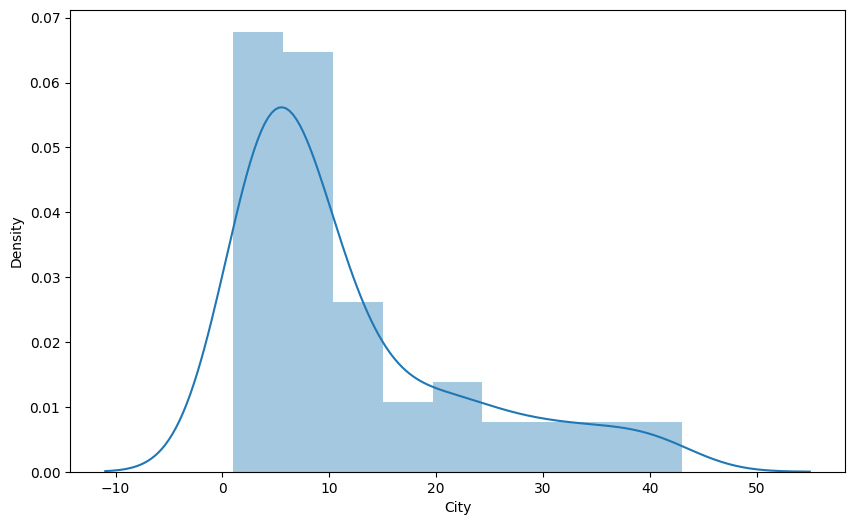

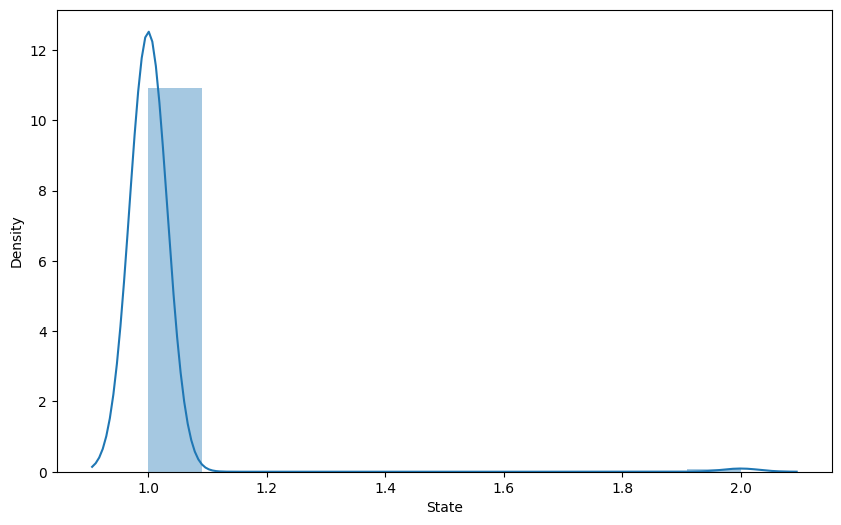

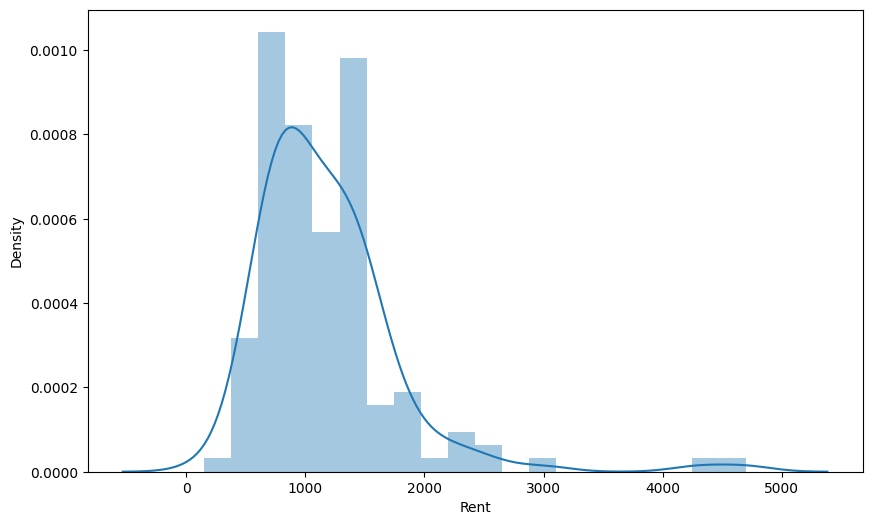

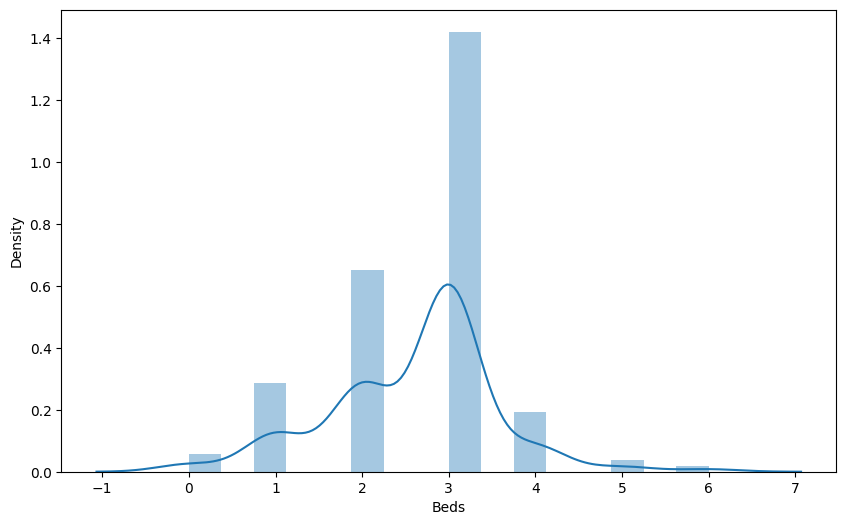

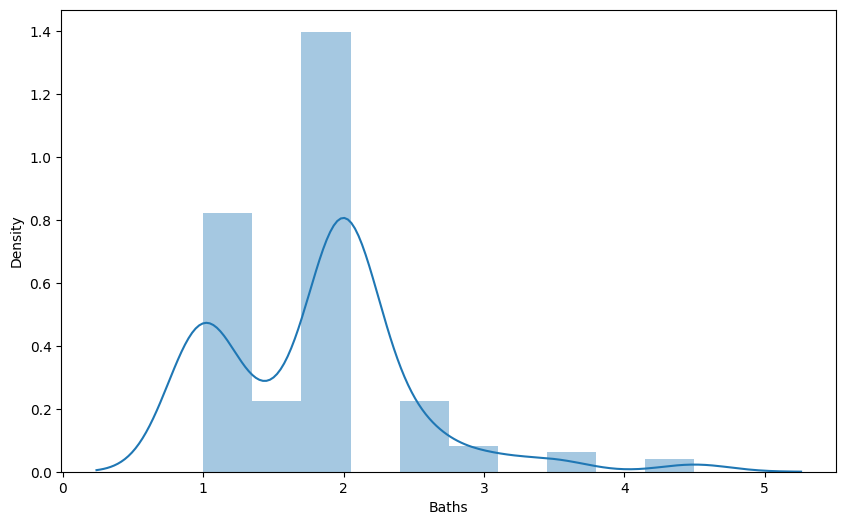

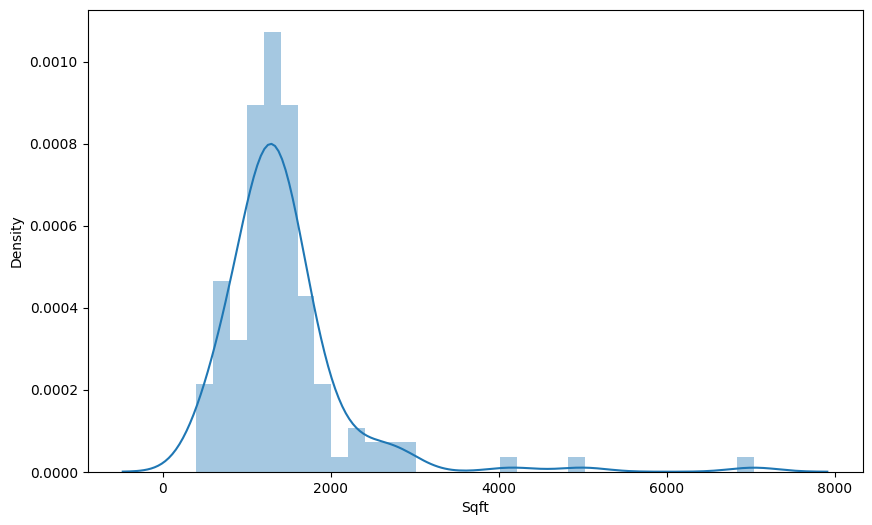

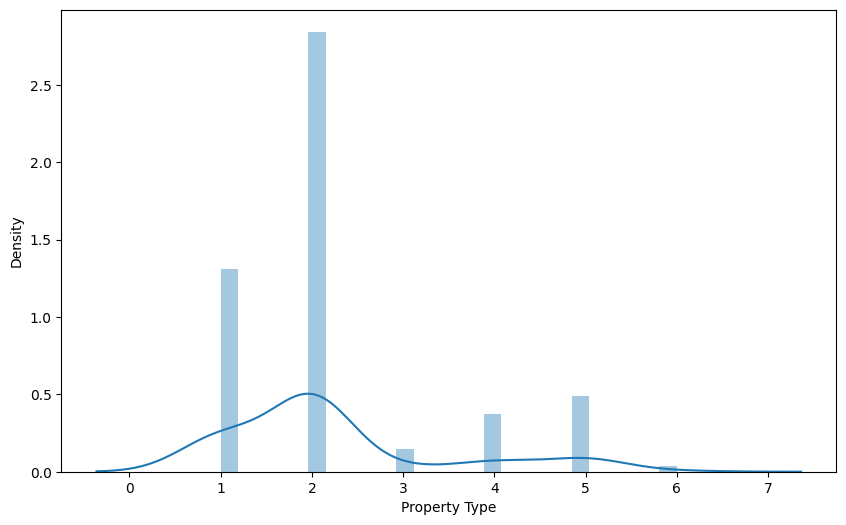

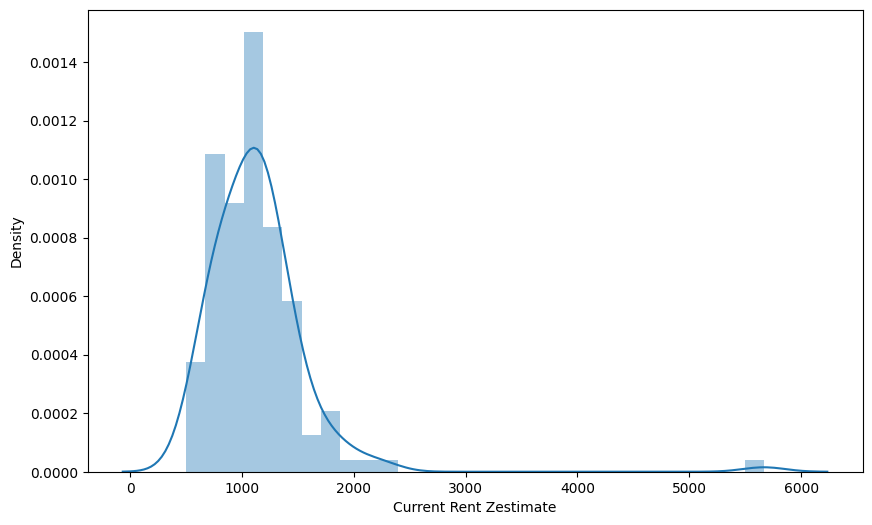

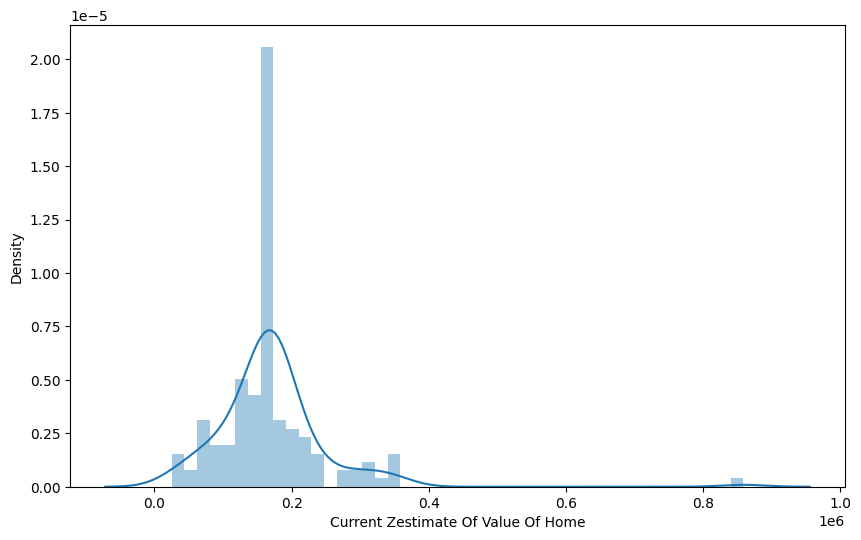

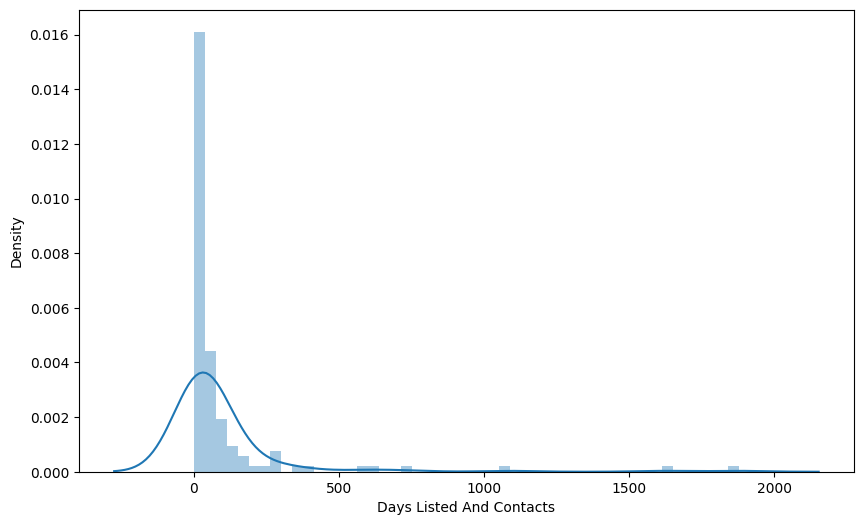

In [80]:
#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()


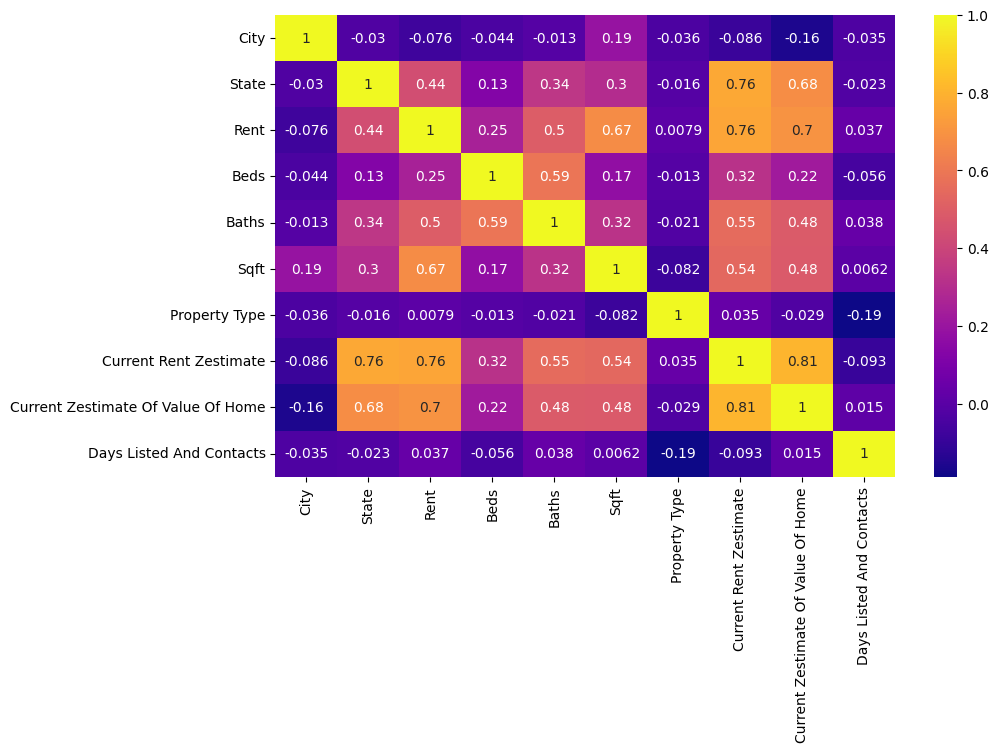

In [83]:
#Now check the correlations


corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

### We will set Rent as the target variable as we want to predict Rent

In [98]:
#Splitting the data

x = df.drop(['Current Zestimate Of Value Of Home'],axis=1)
y = df['Current Zestimate Of Value Of Home']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [99]:
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)

Lasso()

In [100]:
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [101]:
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)

In [ ]:
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [104]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  -0.259615627931975
RIDGE  -0.24576516495308098
LASSO  -0.25945725662439845
ELASTICNET 0.13740141359226254
RANDOM FOREST  0.3444421864014885
GB 0.14131651678812462
ADABOOST 0.20123378745147524
XGB 0.06876188051673882
KNN 0.06136713848507991
SVR -0.0818358505688277
CAT 0.2728010686876542
LIGHTGBM 0.04299201226818794
GUASSIAN PROCESS -4.056447349817164


### Best performing model is XGB

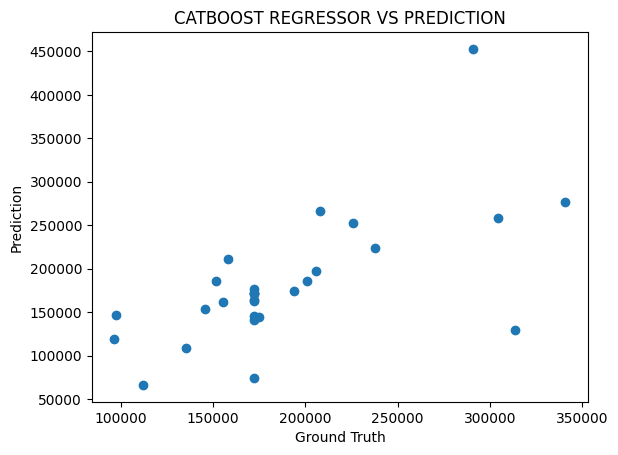

In [105]:
#NOW Visualize the best performing model with testing data

plt.scatter(y_test,xgbpred)
plt.title('CATBOOST REGRESSOR VS PREDICTION')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

In [107]:
#(TO CHECK IF THE MODEL HAS OVERFITTED OR UNDERFITTED)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=xgb,X=x_train_scaled,y=y_train)
print('Cross Val Acc Score of XGB model is ---> ',cross_val)
print('\n Cross Val Mean Acc Score of XGB model is ---> ',cross_val.mean())


Cross Val Acc Score of XGB model is --->  [ 0.83387945  0.51437609  0.42060863  0.41610087 -0.12867437]

 Cross Val Mean Acc Score of XGB model is --->  0.4112581324226399
